In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

X_ = np.array([-2, -1, 0, 1, 2]).reshape(-1, 1)
#Без шума
# y = np.array([2 + item ** 3  for item in X_trai]).reshape(-1, 1)
#С шумом
y  = np.array([2 + item ** 3 + np.random.normal(0, 0.2)  for item in X_]).reshape(-1, 1)


X = pf.fit_transform(X_)


p = 11
pf = PolynomialFeatures(p, include_bias=False)
alphas = [100,10,1,0.1,0.01,0.001,0.0001]
# def add_noise(y, sigma):
#     e = np.random.normal(0, sigma, n_samples)
#     return y+e

    
def get_predictions(mode, sigma = 0):
#     if noise:
#         y = add_noise(y, sigma)
#     X_, y, X = get_data()
    y  = np.array([2 + item ** 3 + np.random.normal(0, sigma)  for item in X_]).reshape(-1, 1)
    arr = []
    coefs = []
    for alpha in alphas:
        model = mode(alpha=alpha).fit(X, y)
        X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
        coefs.append(model.coef_)
        arr.append(model.predict(pf.fit_transform(X_test)))
    return X_test, arr, coefs
      
def make_graph(alphas, regulization,sigma):
#     X_, y, X = get_data()
    x_reg, Arr,coefs = get_predictions(regulization, sigma=sigma)  
    print(pd.DataFrame(np.array(coefs).reshape(len(alphas), p)))
    for i in range(len(alphas)):
        plt.plot(x_reg, Arr[i],'-.', label = f'alpha = {alphas[i]}')
    plt.scatter(X_, y, label='Исходные данные')
    plt.ylim(-30,30)
    plt.title(f'{regulization.__name__}')
    plt.legend()
    plt.show()


         0         1         2         3         4         5         6   \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000 -0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000 -0.000000  0.686315 -0.000000  0.059310  0.000000  0.003721   
4  0.221440 -0.000000  0.699557 -0.000000  0.046410 -0.000000  0.002912   
5  0.249133 -0.044018  0.694439  0.006901  0.046070  0.000979  0.002890   
6  0.251935 -0.054523  0.693921  0.011004  0.046036  0.000640  0.002888   

         7         8         9         10  
0  0.000000  0.000000  0.000000  0.003854  
1  0.000000  0.000000  0.000000  0.003907  
2  0.000000  0.011182  0.000035  0.001117  
3  0.000000  0.000233  0.000038  0.000015  
4  0.000114  0.000182  0.000010  0.000011  
5  0.000058  0.000181  0.000004  0.000011  
6  0.000038  0.000181  0.000002  0.000011  


C:\Users\Bruhonog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.545e-02, tolerance: 1.304e-02
  model = cd_fast.enet_coordinate_descent(


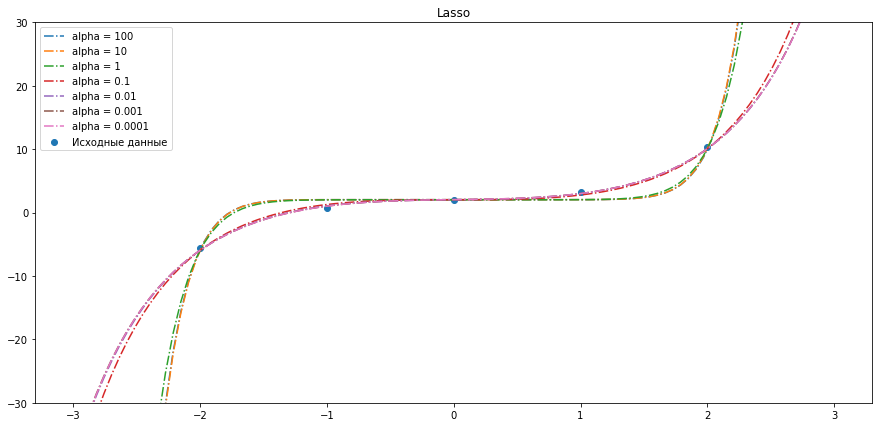

In [59]:
make_graph(alphas,Lasso,sigma=0.1)

         0         1         2         3         4         5         6   \
0  0.016990 -0.000285  0.016939 -0.000281  0.016733 -0.000265  0.015908   
1  0.098883 -0.002386  0.098532 -0.002351  0.097125 -0.002211  0.091497   
2  0.190929 -0.009038  0.190239 -0.008905  0.187483 -0.008375  0.176457   
3  0.210526 -0.012531  0.209765 -0.012348  0.206721 -0.011612  0.194545   
4  0.212709 -0.013035  0.211940 -0.012844  0.208864 -0.012079  0.196561   
5  0.212930 -0.013088  0.212160 -0.012896  0.209081 -0.012128  0.196764   
6  0.212952 -0.013093  0.212182 -0.012901  0.209103 -0.012133  0.196785   

         7         8         9         10  
0 -0.000200  0.012611  0.000062 -0.000579  
1 -0.001652  0.068987  0.000583 -0.021053  
2 -0.006253  0.132353  0.002232 -0.044064  
3 -0.008670  0.145844  0.003099 -0.048963  
4 -0.009019  0.147347  0.003224 -0.049509  
5 -0.009055  0.147499  0.003237 -0.049564  
6 -0.009059  0.147514  0.003238 -0.049570  


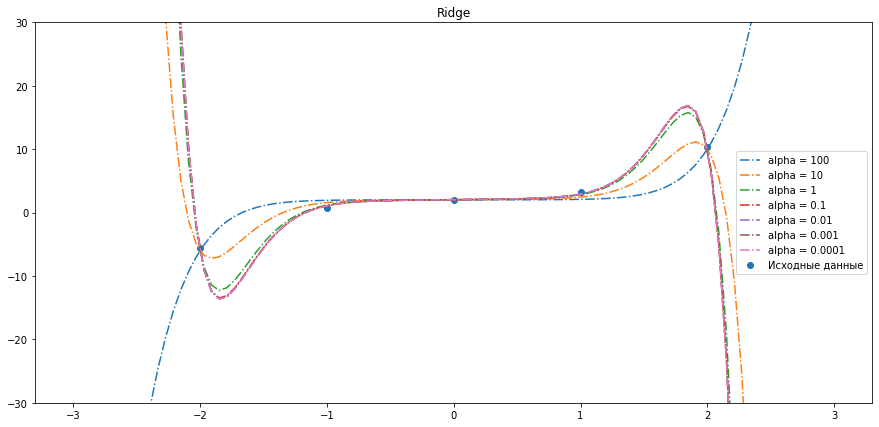

In [60]:
make_graph(alphas,Ridge,sigma=0.1)